# Milestone 1

### Rob Lisy

Generate a clear statement problem and provide location for dataset.
Provide a clear solution to the problem for a non-technical audience. Your solution must include narrative in plain language explaining your results. 

Visually explore the data to generate insight and include summary statistics. For your visualization use multiple views of the data, which can include:
- scatter plots showing key relationships you have found in the dataset. Beware of over-plotting. 
- bar, box or violin plots for various categorical groups within the dataset. 
- Faceted plots to show diffences for different groups with in the data. 
- Other plot types you find useful; heatmaps, histograms, etc. 
- All plots should use methods that will aid in viewer perception. 

----------
Problem statement:
    A young family moving to King county would like to know how housing features contribute to the price of different houses. This may help them focus their search on houses within their price range.
    
Data sets: 
    Housing price data for King County - https://www.kaggle.com/harlfoxem/housesalesprediction
    Neighborhood boundaries and labels - https://data.opendatasoft.com/explore/dataset/zillow-neighborhoods%40public/information/

In [1]:
from os import path
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
# Geopandas is for geospatial analytics.
# Kendall - you'll have to be really careful installing this, it kinda sucks.
# I'm sorry!
import geopandas as gp
from zipfile import ZipFile

# Pretty printing
%precision %.2f
pd.set_option('display.float_format', lambda x: '%.5f' % x)

housing_data = f"kc_house_data.csv"
neighborhoods = f"zillow-neighborhoods.zip"

def download_if_not_exists(URL: str, filename: str):
    """
    Helper function to download the file at the URL if it doesn't already exist
    :param URL: A string with the URL location
    :param filename: The file name on disk
    """
    if path.exists(f"{filename}"):
        return
    else:
        req = requests.get(URL)
        url_content = req.content
        csv_file = open(f"{filename}", 'wb')
        csv_file.write(url_content)
        csv_file.close()
    return

# Download our source data if we don't have it locally...
download_if_not_exists("https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv",
                      housing_data)
# This is the Zillow shape files for neighborhoods.
download_if_not_exists("https://data.opendatasoft.com/explore/dataset/zillow-neighborhoods@public/download/?format=shp&refine.state=WA&refine.county=King&timezone=America/Los_Angeles",
                      neighborhoods)

#unzip the shape file from Zillow
with ZipFile(neighborhoods, 'r') as zip: 
    zip.extractall()

# import the CSVs as a data set
housing = pd.read_csv(housing_data, header=0)
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [2]:
# see what the column types are, and clean them up
housing.dtypes

cat_cols = ['waterfront', 'view','condition','zipcode', 'grade']
for c in cat_cols:
    housing[c] = housing[c].astype('category')

housing['date'] = pd.to_datetime(housing['date'], errors='coerce')

In [3]:
housing.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [4]:
# Let's describe the summary statistics
# Housing data is always SUPER skewed... we're going to generate some custom percentiles for the .describe()
housing.describe(percentiles=[x/10 for x in range(1,10)]+[.95, .99, .995])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,1788.39069,291.50905,1971.00514,84.40226,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31206,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,828.09098,442.57504,29.37341,401.67924,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,47.15590,-122.51900,399.00000,651.00000
10%,1036000346.00000,245000.00000,2.00000,1.00000,1090.00000,3322.20000,1.00000,970.00000,0.00000,1926.00000,0.00000,47.35030,-122.37200,1256.00000,3666.60000
20%,1774000252.00000,298470.00000,3.00000,1.50000,1320.00000,4644.00000,1.00000,1120.00000,0.00000,1947.00000,0.00000,47.43224,-122.34600,1420.00000,4800.00000
30%,2517000630.00000,345000.00000,3.00000,1.75000,1520.00000,5612.00000,1.00000,1260.00000,0.00000,1956.00000,0.00000,47.49690,-122.31200,1550.00000,5625.60000
40%,3278601732.00000,399500.00000,3.00000,2.00000,1710.00000,6744.00000,1.00000,1400.00000,0.00000,1965.00000,0.00000,47.53960,-122.28700,1690.00000,6750.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,1560.00000,0.00000,1975.00000,0.00000,47.57180,-122.23000,1840.00000,7620.00000
60%,5307500252.00000,519000.00000,4.00000,2.50000,2130.00000,8520.20000,2.00000,1760.00000,0.00000,1983.00000,0.00000,47.62110,-122.18900,2020.00000,8382.00000


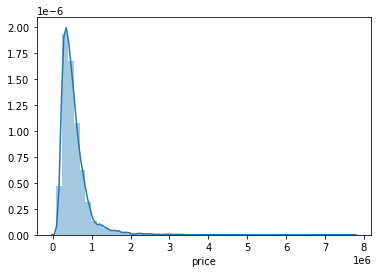

In [5]:
# Graph the price
sns.distplot(housing['price']);

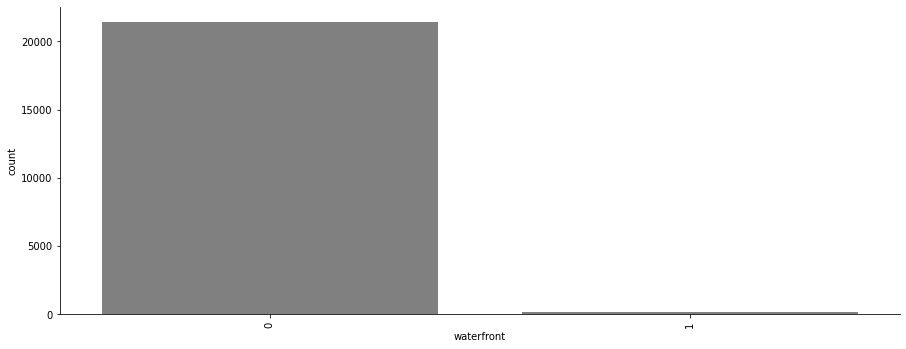

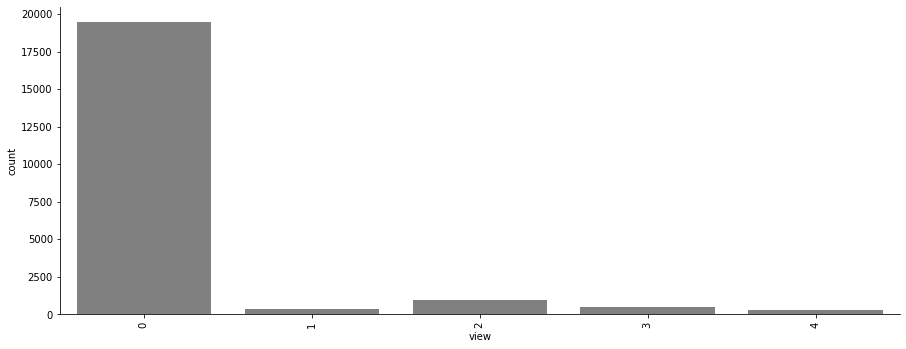

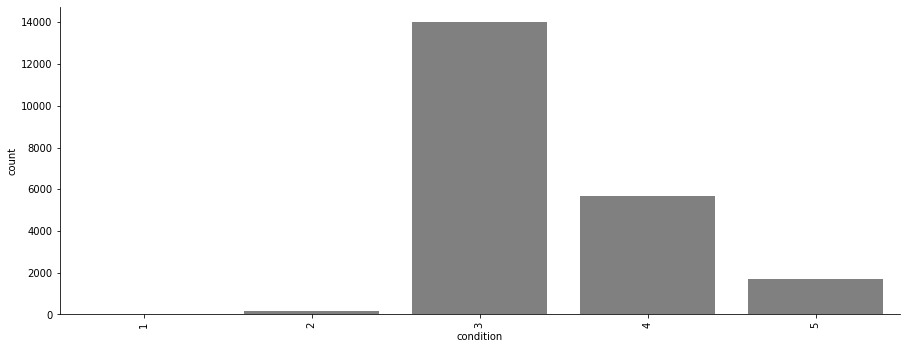

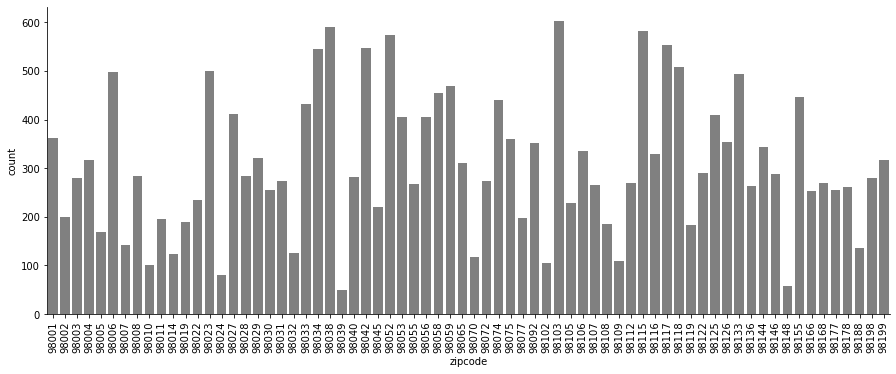

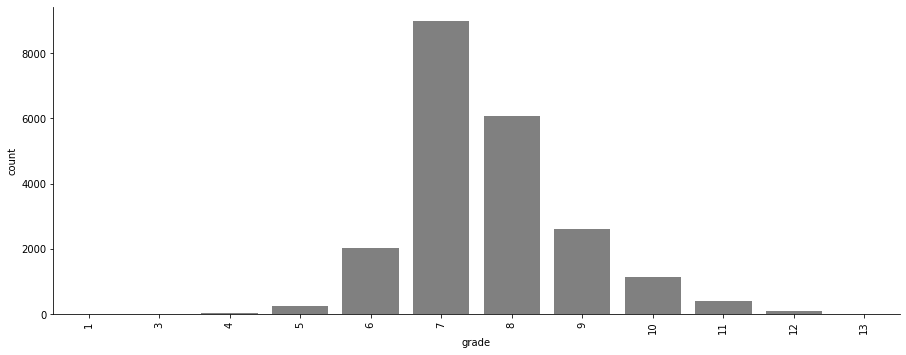

In [6]:
# Plot some densities using bar graphs
cat_cols = ['waterfront', 'view', 'condition', 'zipcode', 'grade']

for c in cat_cols:
    g = sns.catplot(x = c, data = housing, kind = 'count', color = 'grey', aspect = 2.5);
    g.set_xticklabels(rotation = 90);
    plt.show()

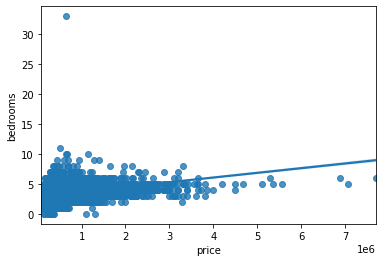

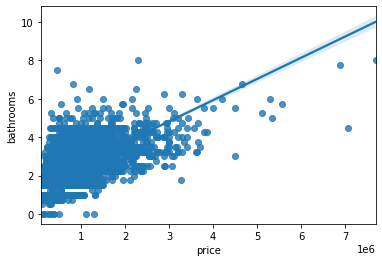

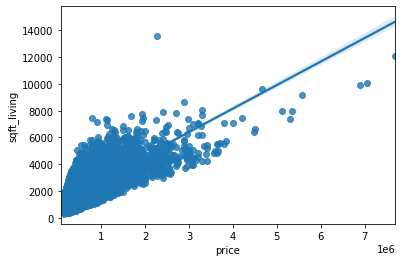

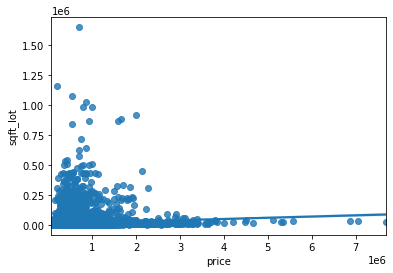

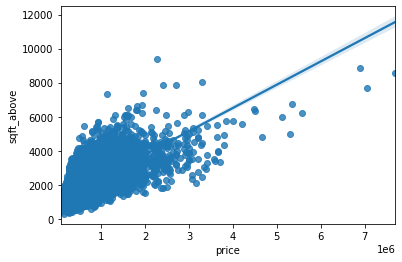

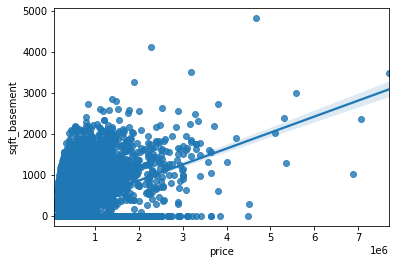

In [7]:
# This is going to be a regression model, since price is continuous. Let's plot relationships between some variables and price.
price_rel_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in price_rel_cols:
    sns.regplot(housing['price'], housing[c])
    plt.show();

# Looks like we can skip being super concerned with `sqft_lot`

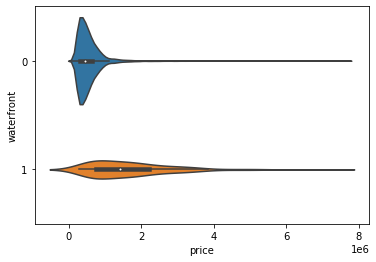

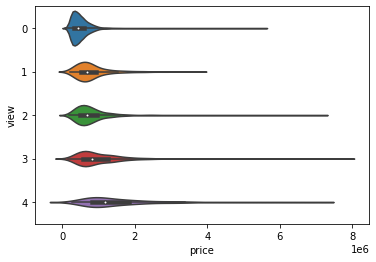

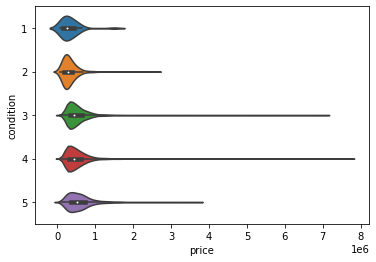

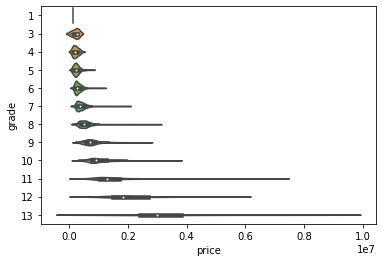

In [8]:
# for the categorical columns, make distribution plots
cat_cols = ['waterfront', 'view', 'condition', 'grade']
for c in cat_cols:
    sns.violinplot(x=housing['price'], y=housing[c])
    plt.show();

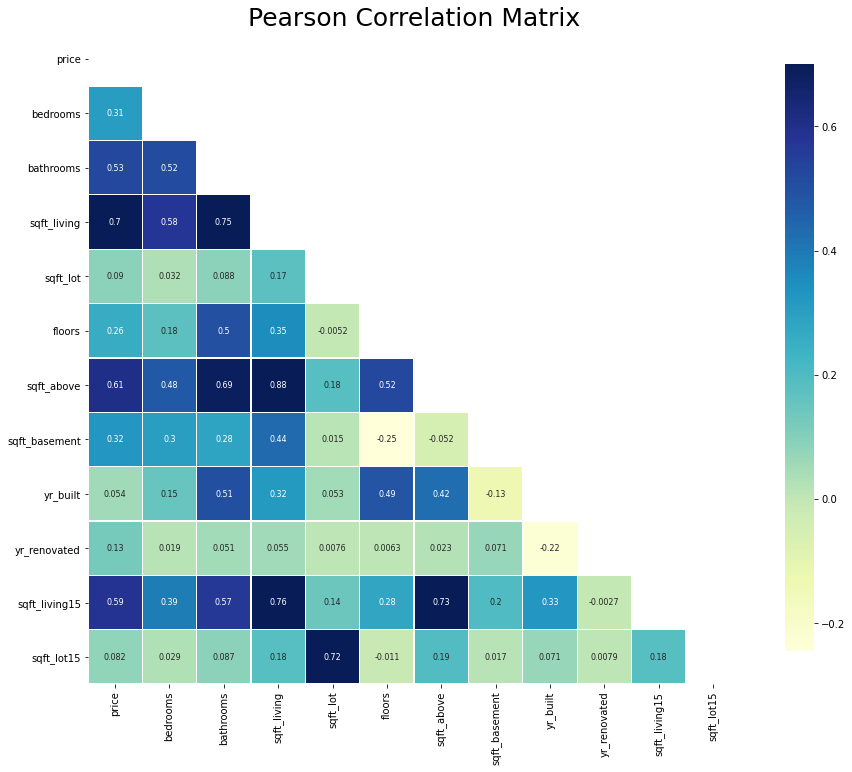

In [9]:
# Let's make a heat map for the correlations
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'sqft_living15','sqft_lot15']

# Remove columns without correlation OR boolean values
mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(housing[features].corr(), linewidths=0.25, vmax=0.7, square=True, cmap="YlGnBu",
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask, cbar_kws={"shrink": .9});

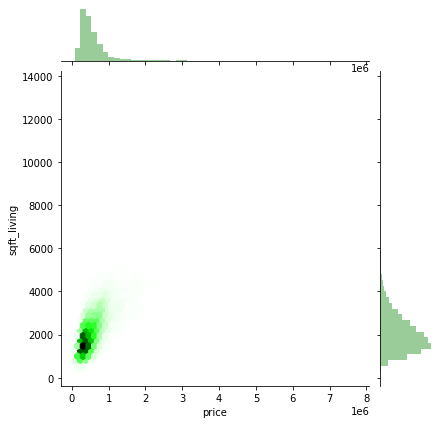

In [10]:
# Hexbin between price and square footage
sns.jointplot(x = 'price', y = 'sqft_living', data = housing, kind = 'hex', color = 'green');

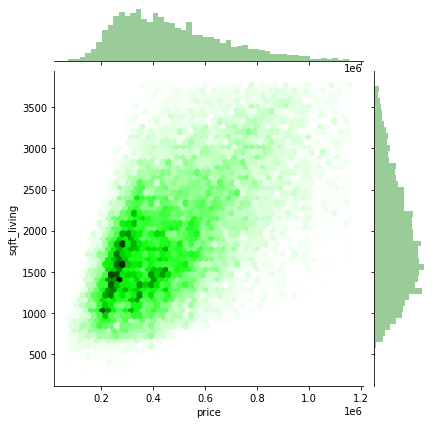

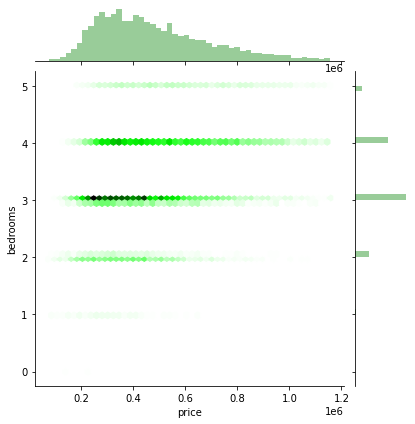

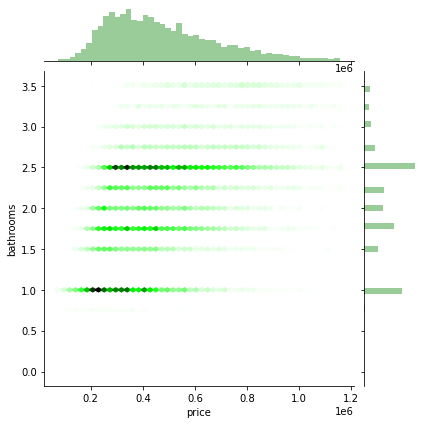

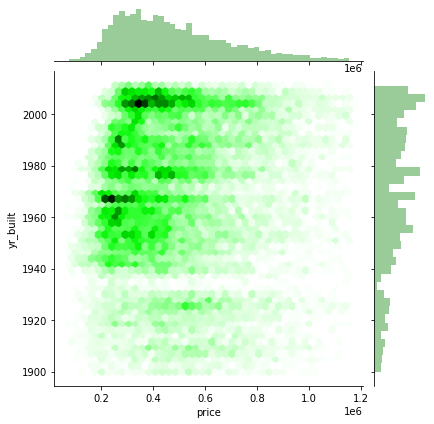

In [11]:
# Looks like this is highly sensitive to outliers (14,000 sq ft house? $7.7m sale price?)
# Let's limit the plot axis so that we're not only seeing those values
# these limits are at the 95% levels, per the .describe() above.
c_price = housing['price'] <= 1156480

cols_conditions = [['sqft_living', (housing['sqft_living'] <= 3760)],
                   ['bedrooms', (housing['bedrooms'] <= 5)],
                   ['bathrooms', (housing['bathrooms'] <= 3.5)],
                   ['yr_built', (housing['yr_built'] <= 2011)]
                  ]
# for every column and filter combo, make a pretty hex bin graph
for c in cols_conditions:
    plot_data = housing[c[1] & c_price]
    sns.jointplot(x = 'price', y = c[0], data = plot_data, kind = 'hex', color = 'green');

# Summary

Our couple who is looking to find a home would do well to keep the total square footage of the property in mind. 

If they want to be conscious of their budget, they should look for: 
- something built in the late 1960s (vs a bunch of the newer houses post 2000 that are higher in price)
- there's lots of variation (and therefore choice) in houses with 2.5 bathrooms
- they'll probably look for a 3 bedroom house

--------
Later in this project I'll be adding neighborhood data to the data set. This should let me build a mult-level regression model, which I've always wanted to do. The benefit of this approach is that any individual house will inherit information from the neighborhood it is in, which would potentially produce a more accurate model.


### Append the neighborhood data

Now that we have the house price data clean, let's append the neighborhood names to each house. That could be a very helpful attribute for any future model.

In [ ]:
# Inspect the neighborhood data...
hoods = gp.read_file("zillow-neighborhoods.shp")
hoods.head()

In [ ]:
housing.head()

In [ ]:
# Great! We have lat/long in the house sale data!
# Convert the house sale data into a geopandas data frame
gdf_housing = gp.GeoDataFrame(housing, geometry=gp.points_from_xy(housing['long'], housing['lat']))
gdf_housing = gdf_housing.set_crs(epsg=4326)
gdf_housing.head()

In [ ]:
# Now we find the intersection between the polygon of the neighborhoods and the points of the houses.
sjoined_housing = gp.sjoin(gdf_housing, hoods, op="within", how="left")
sjoined_housing.head()